In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

dados_renomeados = dados.copy()
mapa = {'droga': 'composto'}
dados_renomeados.columns = dados_renomeados.columns.str.replace("[-]", "")
dados_renomeados.rename(columns=mapa, inplace=True)

cod_compostos = dados_renomeados['composto'].value_counts().index[0:5]

dados_c = dados.loc[:,'c-0':'c-99']
dados_c_descritos = dados_c.describe()
dados_c_tranpostos = dados_c_descritos.T

dados_g = dados.loc[:,'g-0':'g-771']
dados_g_descritos = dados_g.describe()
dados_g_tranpostos = dados_g_descritos.T


dados

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize ='index')

In [209]:
#Desafio 01 - A ordem tem que ser essa, mudando a ordem de ['dose', 'tempo', 'tratamento'], muda a formatação da tabela. Apesar de fazer o mesmo, precisa usar o count e o unstack para ser visualizada como o crosstab.
desafio_01 = dados.groupby(by = ['dose', 'tratamento', 'tempo'])['tempo'].count().unstack()
desafio_01

tempo                24    48    72
dose tratamento                    
D1   com_controle   301   343   307
     com_droga     3585  4011  3600
D2   com_controle   305   305   305
     com_droga     3581  3591  3580

In [210]:
#Desafio 02
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize ='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [211]:
#Se usar o values, tem que usar o aggfunc, e vice-versa
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [212]:
#Desafio 04: o melt refaz a tabela, deixando apenas duas informações: a variavel e o seu valor.
desafio_04 = desafio_01.melt()
desafio_04

,tempo,value
0,24,301
1,24,3585
2,24,305
3,24,3581
4,48,343
5,48,4011
6,48,305
7,48,3591
8,72,307
9,72,3600


In [ ]:
sns.scatterplot(x = 'g-0', y='g-3', data = dados)

In [ ]:
sns.scatterplot(x = 'g-0', y='g-8', data = dados)

In [ ]:
sns.lmplot(x = 'g-0', y='g-8', data = dados, line_kws={'color': 'red'})

In [ ]:
sns.lmplot(x = 'g-0', y='g-8', data = dados, line_kws={'color': 'red'}, col='tratamento', row = 'tempo')

In [ ]:
corr_g = dados_g.corr()
corr_c = dados_c.corr()

In [ ]:
mask = np.triu(np.ones_like(corr_c, dtype=bool))

f, ax = plt.subplots(figsize=(22, 18))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Desafio 05. Mudaando Range de col_genes -> muda g-XX
cols_genes = [f'g-{i}' for i in range(51, 101)]
cols_celular = [f'c-{i}' for i in range(0, 51)]
corr_mat = dados[cols_genes+cols_celular].corr().loc['c-0':'c-50','g-51':'g-100']
corr_mat

As correlações entre os grupos celulares e os grupos gênicos podem se dar pelo fato dos grupos gênicos estarem presentes em naquelas celulas. Pela analise, se percebe que todos a influência ou não dos grupos gênicos é uniforme entre os grupos celulares: caso haja correlaçao entre o g-0 e o c-0, o valor dessa é próximo ao valor da correlação entre g-0 e c-1. Assim como há grupos gênicos que não tem essa correlação com os grupos celulares, também sendo uniforme nesse sentido.

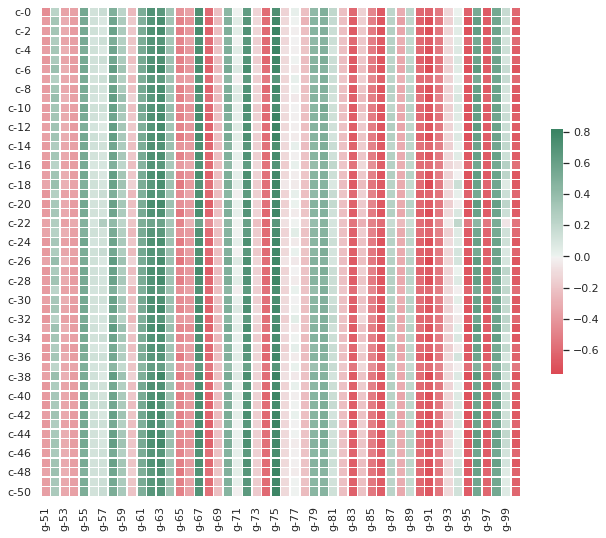

In [214]:
#Grafico Desafio 05 e #Desafio 06
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(10, 150, as_cmap=True)

sns.heatmap(corr_mat, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Desafio 03: A função aggfunc recebe diversas funções, desde que elas estejam definidas em 'DataFrameGroupBy'. Elas podem ser encontradas na documentação do pandas em: https://pandas.pydata.org/docs/reference/groupby.html

Desafio 07: Nas análises de hoje, percebeu-se que os grupos de tempo e de dose são uniformes. O grupo chamado com_controle é menor que o grupo com_droga, mas também segue uma uniformidade entre as doses e os tempos de medição(cerca de 7% de faz parte do grupo de controle e 93% do grupo que recebeu compostos). 
Ao utilizar a função scatterplot(), notou-se que alguns grupos gênicos apresentam correlação entre si, assim como grupos celulares. Analisou-se também a correlação entre grupos gênicos e grupos celulares, resultados que podem mostrar a função do grupo gênico na célula em questão.